## Convolutional Neural Network using MNIST dataset

### Data Import & Preprocessing
- The images in the dataset are grayscale, with pixel values ranging from 0 to 255. The code normalizes these pixel values to the range [0, 1] by dividing each pixel value by 255.

- The .reshape() method is used to reshape the training and test data to have an extra dimension, representing the number of channels (in this case, 1 channel for grayscale images). This is necessary for feeding the data into convolutional layers.

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255, X_test/255

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

11490434/11490434 [==============================] - 1s 0us/step


### Model Building

In [2]:
from tensorflow.keras import layers, models

In [5]:

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu', input_shape=(28,28,1)),
    layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(64, (2,2), activation='relu', padding='same'),
    layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

### Model Compilation and Training

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
%%time

hist = model.fit(X_train, y_train, epochs=5, verbose=1, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1135 - accuracy: 0.9647 - val_loss: 0.0419 - val_accuracy: 0.9857
Epoch 2/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0461 - accuracy: 0.9854 - val_loss: 0.0390 - val_accuracy: 0.9870
Epoch 3/5
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0329 - accuracy: 0.9901 - val_loss: 0.0286 - val_accuracy: 0.9913
Epoch 4/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0256 - accuracy: 0.9921 - val_loss: 0.0256 - val_accuracy: 0.9911
Epoch 5/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0206 - accuracy: 0.9935 - val_loss: 0.0438 - val_accuracy: 0.9862
CPU times: user 6min 4s, sys: 2min 1s, total: 8min 6s
Wall time: 2min 14s


### Visualization of Results

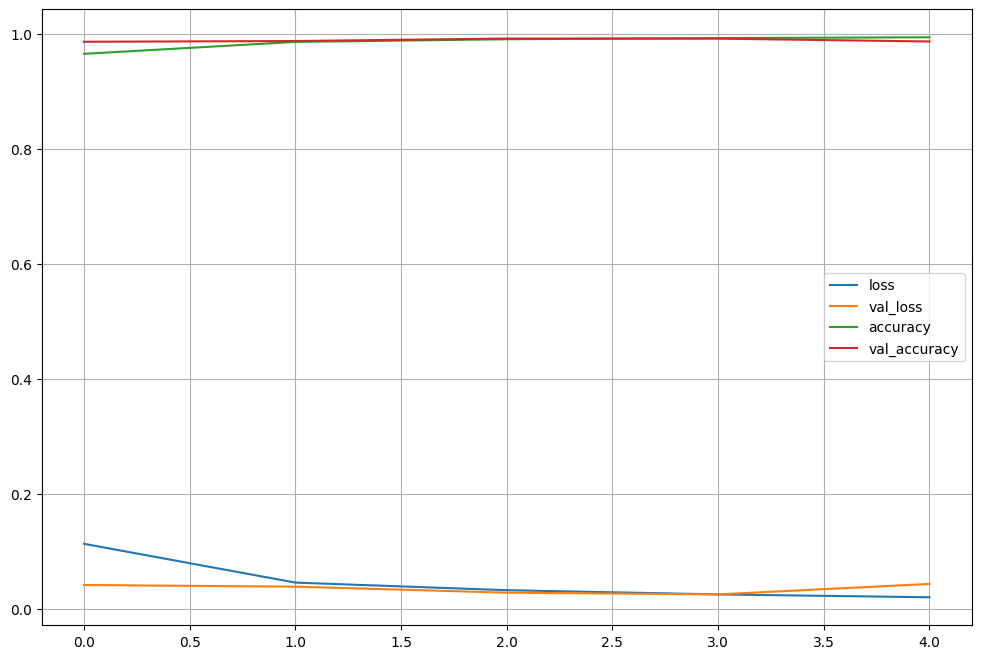

In [9]:
import matplotlib.pyplot as plt

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [10]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 [==============================] - 2s 6ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [14]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

138

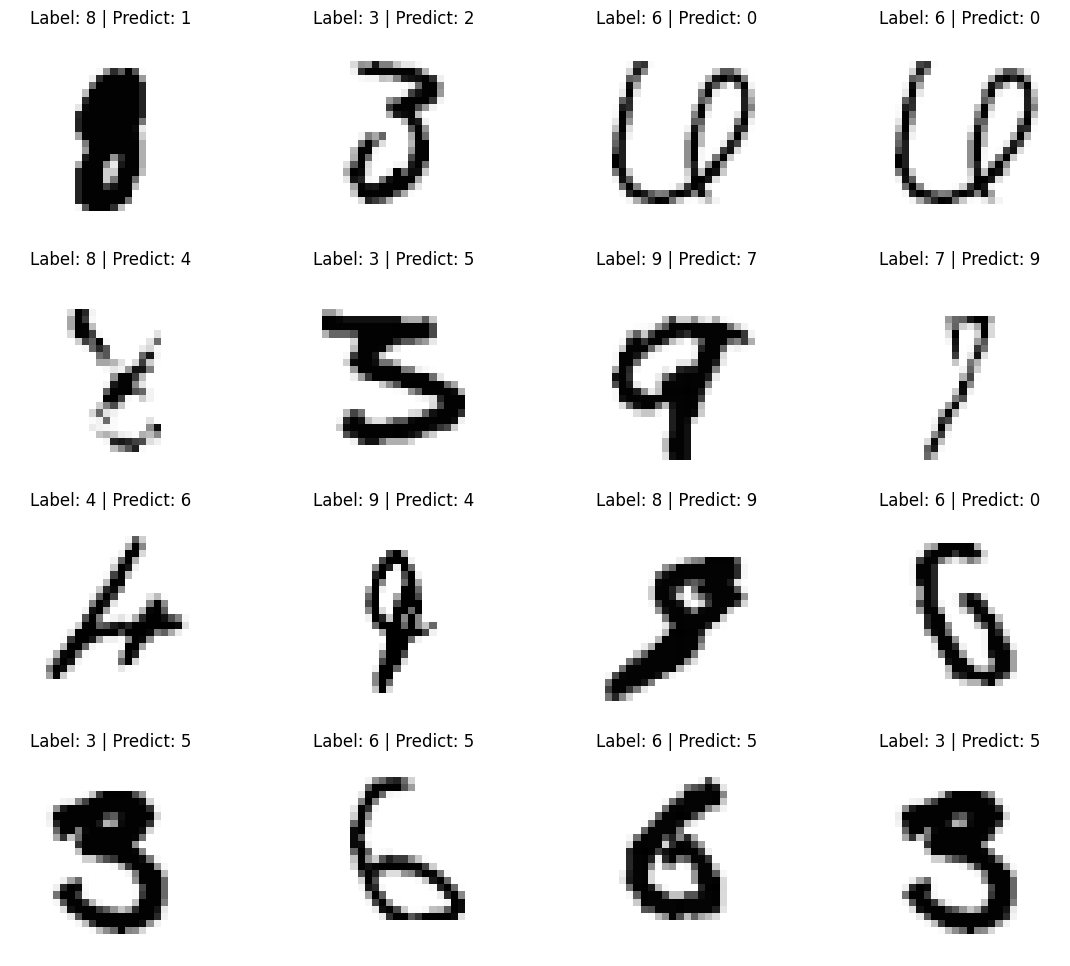

In [16]:
import random

samples = random.choices(population=wrong_result, k=16)

plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28,28), cmap='Greys')
    plt.title('Label: ' + str(y_test[n]) + ' | Predict: ' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()

In [18]:
score = model.evaluate(X_test, y_test)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

313/313 [==============================] - 1s 5ms/step - loss: 0.0438 - accuracy: 0.9862
Test loss:  0.04381295666098595
Test accuracy:  0.9861999750137329
